# kemlm biden fine-tuned 

Accuracy: 0.7200
F1 Score (Micro): 0.7200
F1 Score (Macro): 0.6465
Confusion Matrix:
[[ 3  2  1]
 [ 3 21  9]
 [ 1  5 30]]


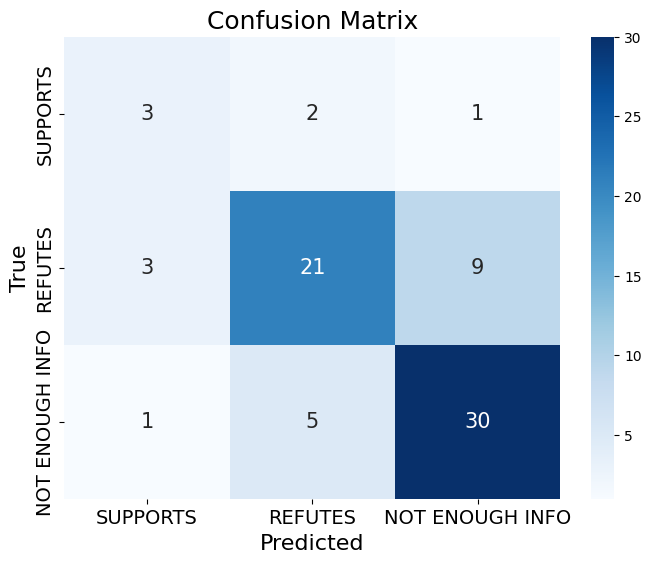

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification
from preparing.preprocessor import Preprocessor
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split


train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_dev.json'
fine_tuned_model_path = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/src/traind_models/fine-tuned-kemlm_English'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)

#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

#Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

#Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)

label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

#Load tokenizer and model (from the fine-tuned KE MLM)
tokenizer = AutoTokenizer.from_pretrained(fine_tuned_model_path)
model = AutoModelForSequenceClassification.from_pretrained(fine_tuned_model_path,num_labels=3)

# Tokenize texts 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)

# Prepare labels as tensors
test_labels_tensor = torch.tensor(test_labels_mapped)


model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#  Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)

# kemlm biden base

/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Accuracy: 0.4400
F1 Score (Micro): 0.4400
F1 Score (Macro): 0.2157
Confusion Matrix:
[[ 0  0  6]
 [ 6  0 27]
 [ 3  0 33]]


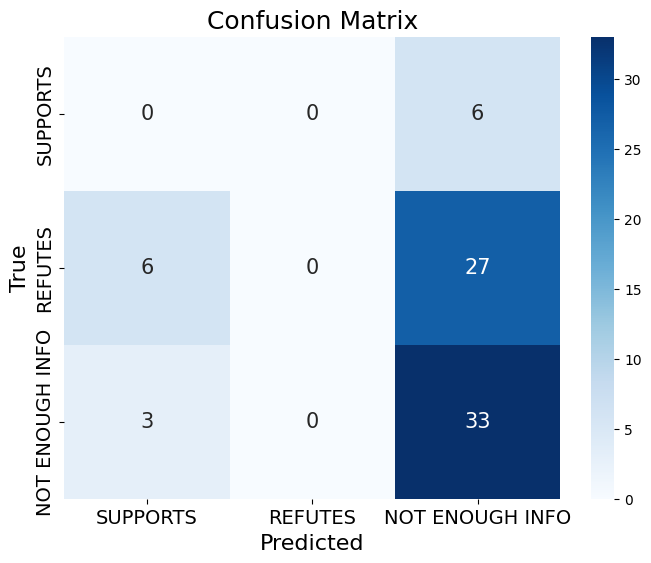

In [11]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification
from preparing.preprocessor import Preprocessor
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split


train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_dev.json'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')


#Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

#Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)

label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

#Load tokenizer and model zero-shot
tokenizer = AutoTokenizer.from_pretrained('kornosk/bert-election2020-twitter-stance-biden-KE-MLM')
model = AutoModelForSequenceClassification.from_pretrained('kornosk/bert-election2020-twitter-stance-biden-KE-MLM',num_labels=3)

# Tokenize texts 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)


test_labels_tensor = torch.tensor(test_labels_mapped)


model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#  Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)

# kemlm trump base

/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Accuracy: 0.4800
F1 Score (Micro): 0.4800
F1 Score (Macro): 0.2162
Confusion Matrix:
[[ 0  0  6]
 [ 0  0 33]
 [ 0  0 36]]


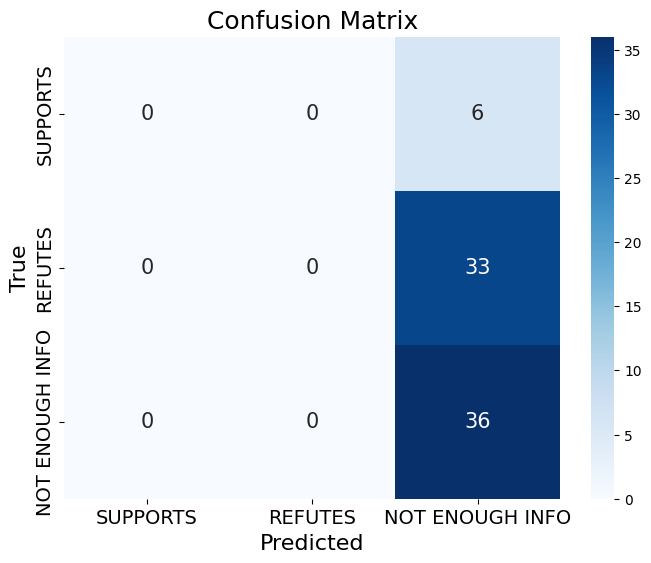

In [13]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification
from preparing.preprocessor import Preprocessor
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split


train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_dev.json'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')


#Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

#Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)

label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

#Load tokenizer and model zero-shot
tokenizer = AutoTokenizer.from_pretrained('kornosk/bert-election2020-twitter-stance-trump-KE-MLM')
model = AutoModelForSequenceClassification.from_pretrained('kornosk/bert-election2020-twitter-stance-trump-KE-MLM',num_labels=3)

# Tokenize texts 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)


test_labels_tensor = torch.tensor(test_labels_mapped)

model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#  Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)